In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
dataset_list = ['PCR', 'digits', 'COIL-20', 'F-MNIST']
method_list = ['PCA', 'KPCA', 'LE', 'Isomap', '$t$-SNE', 'UMAP', 'GPLVM', 'VAE', 'IKD']
d_latent_list = [2, 3, 5, 10]
k_list = [5, 10, 20]

df_list = []
for dataset in dataset_list:
    temp = pd.read_csv(f'{dataset}/knn.csv', index_col=0)
    temp['dataset'] = dataset
    df_list.append(temp)
df = pd.concat(df_list, ignore_index=True)
df.d_latent = df.d_latent.astype(str)

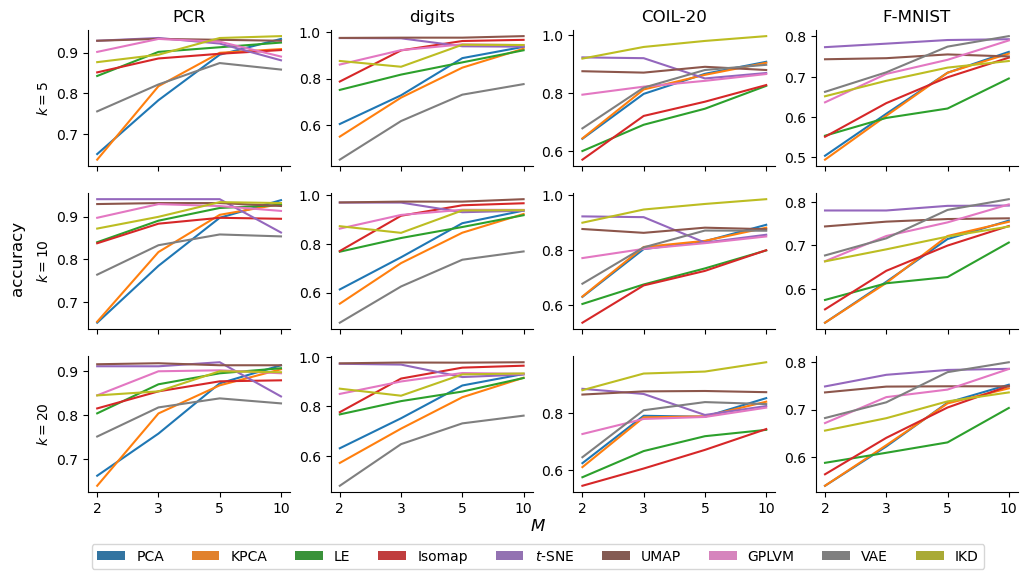

In [5]:
ax = sns.barplot(data=df[(df.dataset == dataset) & (df.k == 5)], x='method', y='accuracy', hue='method')
handles, labels = ax.get_legend_handles_labels()
plt.close()
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True)
for i in range(3):
    for j in range(4):
        dataset = dataset_list[j]
        ax = sns.lineplot(data=df[(df.dataset == dataset) & (df.k == [5, 10, 20][i])], x='d_latent', y='accuracy', hue='method', ax=axs[i, j], legend=False, ci=None)
#         ax.set(ylim=[0.4, 1], ylabel=None)
        ax.set(xlabel=None, ylabel=None)
        if i == 0:
            ax.set_title(dataset)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if j == 0:
            ax.set(ylabel=f'$k={[5, 10, 20][i]}$')
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=9)
fig.supylabel('accuracy', x=0.06)
fig.supxlabel('$M$', y=0.04)
fig.savefig('real_world_accuracy.pdf', bbox_inches='tight')

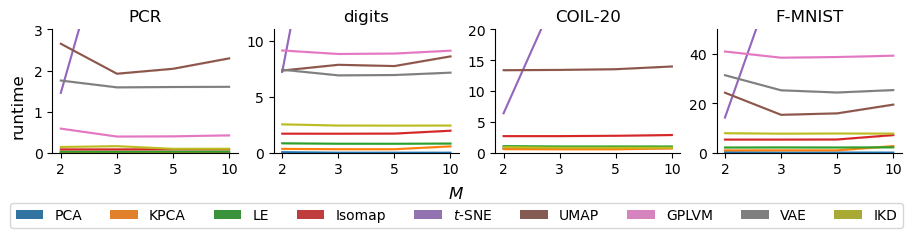

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(9, 2), sharex=True, constrained_layout=True)
for j in range(4):
    dataset = dataset_list[j]
    ax = sns.lineplot(data=df[(df.dataset == dataset) & (df.k == 5)], x='d_latent', y='runtime', hue='method', ax=axs[j], legend=False)
    ax.set(xlabel=None, ylabel=None)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(dataset)
axs[0].set(ylim=[0, 3])
axs[1].set(ylim=[0, 11])
axs[2].set(ylim=[0, 20])
axs[3].set(ylim=[0, 50])
fig.supylabel('runtime')
fig.supxlabel('$M$')
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=9)
fig.savefig('real_world_runtime.pdf', bbox_inches='tight')

In [33]:
k = 20

def leading0(x):
    return f'{x:.2f}'.lstrip('0')

print('method', end='')
for j in range(4):
    print(f' & {dataset_list[j]}', end='')
print('\\\\')
for i in range(len(method_list)):
    print(f'{dataset_list[i]}', end='')
    for j in range(8):
        temp = df.loc[(df.k == k) & (df.method == method_list[j]) & (df.dataset == dataset_list[i])]
        print(f' & {leading0(temp.accuracy.mean())}\\scriptsize{{$\pm${leading0(temp.accuracy.std())}}}', end='')
        if j == 7:
            print('\\\\')

dataset & PCA & KPCA & LE & Isomap & TSNE & UMAP & GPLVM & IKD\\
PCR & .66\scriptsize{$\pm$.09} & .64\scriptsize{$\pm$.08} & .80\scriptsize{$\pm$.05} & .81\scriptsize{$\pm$.04} & .91\scriptsize{$\pm$.03} & .92\scriptsize{$\pm$.03} & .81\scriptsize{$\pm$.04} & .84\scriptsize{$\pm$.07}\\
digits & .63\scriptsize{$\pm$.03} & .57\scriptsize{$\pm$.04} & .77\scriptsize{$\pm$.05} & .78\scriptsize{$\pm$.04} & .97\scriptsize{$\pm$.03} & .97\scriptsize{$\pm$.02} & .88\scriptsize{$\pm$.05} & .87\scriptsize{$\pm$.06}\\
COIL-20 & .62\scriptsize{$\pm$.08} & .61\scriptsize{$\pm$.10} & .57\scriptsize{$\pm$.12} & .55\scriptsize{$\pm$.03} & .88\scriptsize{$\pm$.04} & .86\scriptsize{$\pm$.05} & .74\scriptsize{$\pm$.07} & .88\scriptsize{$\pm$.05}\\
F-MNIST & .53\scriptsize{$\pm$.02} & .53\scriptsize{$\pm$.02} & .58\scriptsize{$\pm$.02} & .60\scriptsize{$\pm$.01} & .77\scriptsize{$\pm$.02} & .76\scriptsize{$\pm$.01} & .67\scriptsize{$\pm$.02} & .65\scriptsize{$\pm$.01}\\
